# HW3 AI - reyhaneh derafshi - 610396098

genetic algorithm, hill climbing, simulated anealing

In [3]:
import math
import random

definition of ‫‪Ackley‬‬ ‫‪function‬‬, it takes a choromosome as a list of x and y and returns f(x,y)

In [4]:
def fitness(chromosome):
    x, y = chromosome
    return -20 * math.exp(-0.2 * math.sqrt(0.5 * (x ** 2 + y ** 2))) - math.exp(
        0.5 * (math.cos(math.pi * 2 * x) + math.cos(math.pi * 2 * y))) + math.exp(1) + 20


 (each stap has been shown in the code)

### genetic algorithm :

1. making our initial population by constructing pop_size of random nodes.
2. sort our population using fitness function difined above in order to choose our parents.
3. we take the half best of our population and choose parent_size number of it randomly.
4. using crossover function to generate children using alpha. it poduces parent_size * parent_size children.
5. using mutation function on every child with the probability of beta.
6. we replace the half bad part of population by randomly selected childs from half good part of them.
7. if iterator reaches the "iterations" then the program ends.
8. the graph of the best answer in each iteration has been drawn and the final anwer has been printed.

x: 0.0 y: 0.0 f(x,y): 0.0


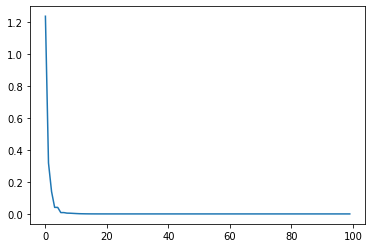

In [11]:
alpha = 0.7
beta = 0.1
iterations = 100
pop_size = 100
parent_size = 10

#5
def mutation(chromosome):
    if random.random() < beta:
        chromosome[random.choice([0, 1])] = random.random() * 10 - 5

#4        
def crossover(parent1,parent2):
    x1, y1 = parent1
    x2, y2 = parent2
    child1 = [(x1 + x2) * alpha, (y1 + y2) * alpha]
    child2 = [(x1 + x2) * (1 - alpha), (y1 + y2) * (1- alpha)]
    return child1, child2

# 1
population = list()
for _ in range(pop_size):
    population.append([random.random() * 10 - 5, random.random() * 10 - 5])

bests = []
population.sort(key=fitness)  #2

for _ in range(iterations): #6   
    parents = random.choices(population[:int(100//2)], k = parent_size)  #3
    children = []
    for p1 in parents:
        for p2 in parents:
            c1, c2 = crossover(p1, p2)  #4
            mutation(c1)  #5
            mutation(c2)
            children.append(c1)
            children.append(c2)
    #7       
    children.sort(key=fitness)
    population  = population[:int(pop_size//2)] +  random.choices(children[:pop_size], k = int(pop_size//2))
    population.sort(key=fitness)
    bests.append(fitness(population[0]))
    
#8
print("x:",round(population[0][0],3),
      "y:",round(population[0][1],3),"f(x,y):", round(fitness(population[0]),3))

import matplotlib.pyplot as plt
x = list(range(iterations))

plt.plot(x, bests)
plt.show()

### hill climbing algorithm:

we start from the root difined as [-5,-5].
at each step root is replaced by its best succesor.

we calculate the best succesor by this method:
1. we divide the continous space by 0.01 to make discerete space.
2. we calculate the value of three ahead neighbors of each node and return the best. (and if there wasn't any better one but there was one that was the same we return that.)
3. if there isn't any better or same neighbor then the algorithm executes.

the final answer has been returned.

In [91]:
def best_succesor(node):
    x, y = node
    x2,y2 = node
    best = fitness(node)
    
    for I in range(0,100):
        for J in range(0,100):
            i = I/100
            j = J/100
            if abs(x+i) <= 5 and abs(y+j) <= 5:
                temp = fitness([x+i,y+j])
                if temp <= best:
                    best = temp
                    x2 = x+i
                    y2 = y+j
    if x == x2 and y == y2:
        return False, [x,y]
    else:
        return True, [x2,y2]
    

root = [-5,-5]
iterate = True

while iterate:
    iterate, root = best_succesor(root)

root
                

[6.245004513516506e-16, 6.245004513516506e-16]

### simulated anealing algorithm:

1. function schedule decreases T by multiplying it with alpha.
2. define initial root
3. at each step we produce a random succesor,if it was better than our root, we replace the root.
4. else we replace if with a probability calculated using T which decreases as the algorithm goes long.
5. when T decreases enough until it reaches to almost zero program ends.
6. the final result has been printed.

In [81]:
def random_succesor(node):
    x, y = node
    x2,y2 = random.choice([(0.01,0), (0,0.01), (0.01,0.01)])
    return [x+x2, y+y2]
    
def schedule(T):
    alpha = 0.995
    return T * alpha

t = 0
T = 400
current = [-5,-5]
while True:
    
    t += 1
    T = schedule(T)
    if T < 0.0001:
        print()
        break
    else:
        next_ = random_succesor(current)
        delta_E = fitness(current) - fitness(next_)
        if delta_E >= 0:
            current = next_
        else:
            if random.random() <= math.exp(delta_E * 500 / T):
                current = next_
                
current
    
    

[0.009999999999937692, 0.009999999999937692]